In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import random
r = []
b = []
n = 100
d = np.zeros((n,2))

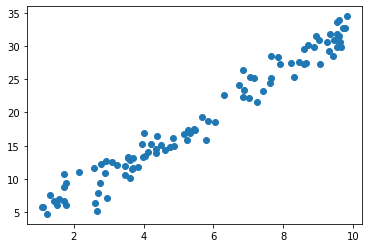

In [2]:
Mean = 0
STD = 2
for i in range (n):
    x = np.random.uniform(1,10)
    d[i,0] = x
    r.append(x)
    y = (3*x+2)+ np.random.normal(Mean,STD)
    b.append(y)
plt.scatter(r,b,marker='o')
data = {"x":r,
        "y":b}
df = DataFrame(data)

In [3]:
df_nan = df.copy(deep=True)
from random import sample
a = random.sample(range(0, df.shape[0]),15)
print ('list_index_nan : ',a)
for i in a:
    df_nan.iloc[i,0]=np.nan

list_index_nan :  [5, 8, 35, 4, 55, 82, 2, 79, 0, 95, 73, 68, 85, 93, 80]


In [4]:
df_drop_nan = df_nan.copy(deep=True)
df_drop_nan = df_drop_nan.dropna()

In [5]:
def compute(dataset_with_nan, method):
    df_replaced = dataset_with_nan.copy(deep=True)
    nullity = df_replaced['x'].isnull()
    replace_value = 0.0
    if method == "max":
        replace_value = df_replaced['x'].max()
    elif method == "median":
        replace_value = df_replaced['x'].median()
    elif method == "mean":
        replace_value = df_replaced['x'].mean()
    elif method == "min":
        replace_value = df_replaced['x'].min()
    else:
        raise Exception("method " + method + " is not recognized")
    df_replaced['x'].fillna(replace_value,inplace=True)
    df_replaced.plot(x='x', y='y',  kind='scatter', alpha=0.5,c=nullity, cmap='rainbow', label= method);
    return df_replaced

In [6]:
replace_missingValues = {}
replace_missingValues['initial'] = df
replace_missingValues['dropna'] = df_drop_nan

<Figure size 1080x1080 with 0 Axes>

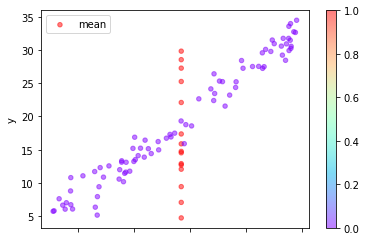

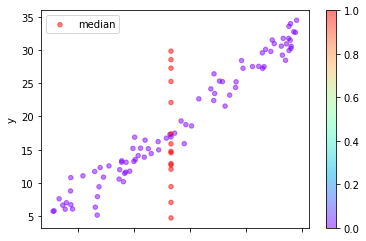

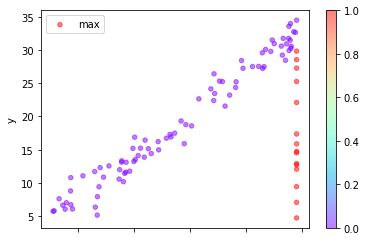

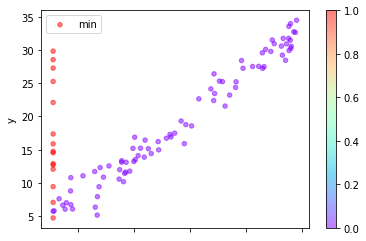

In [7]:
plt.figure(figsize=(15,15))
for label in ["mean","median", "max", "min"]:
    replace_missingValues[label] = compute(df_nan, label)

In [8]:
def LR_missingvalue (df_completed):
    from sklearn.linear_model import LinearRegression
    x = np.array(df_completed['x']).reshape(df_completed['x'].shape[0],1)
    y = df_completed['y']
    rg = LinearRegression()
    rg.fit(x,y)
    predict_line = rg.predict(x)
    return predict_line, rg.coef_, rg.intercept_

In [9]:
LR_predict_slope_intercept = {}
for label, df_completed in replace_missingValues.items():
    LR_predict_slope_intercept[label] = LR_missingvalue(df_completed)

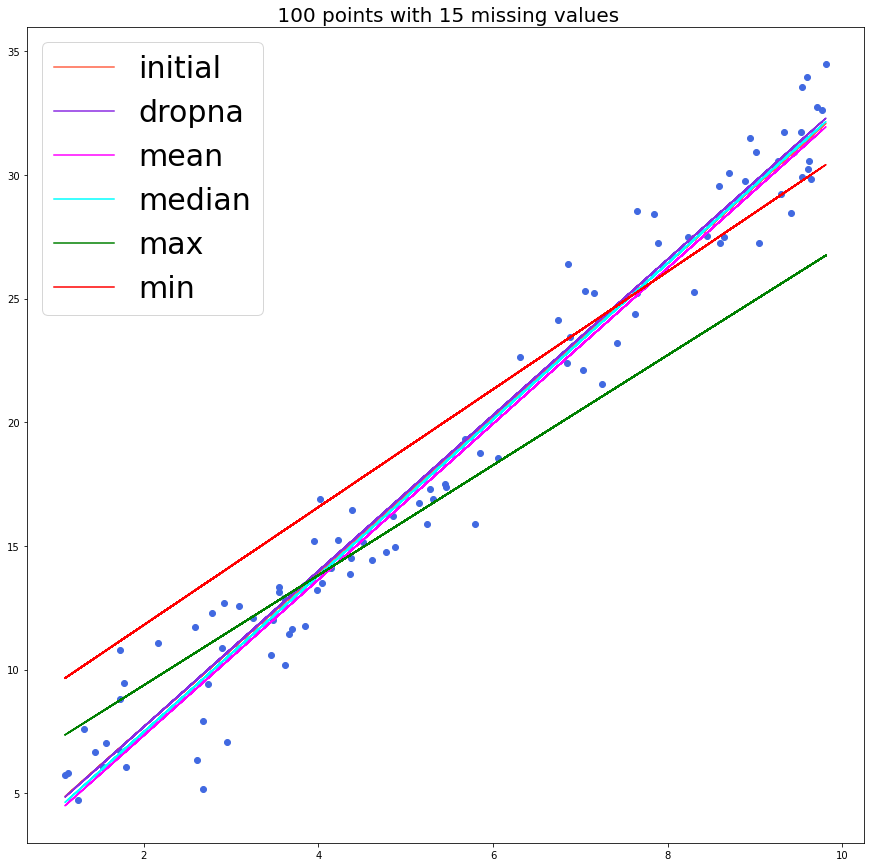

In [13]:
color_map = {
    "initial": "tomato",
    "dropna": "blueviolet",
    "mean": "fuchsia", 
    "median": "cyan", 
    "max": "green", 
    "min": "red"
}

plt.figure(figsize=(15,15))
plt.scatter(df['x'],df['y'], c = 'royalblue', )
for label, result in LR_predict_slope_intercept.items():
    plt.plot(replace_missingValues[label]['x'], result[0], c=color_map[label], label=label)
plt.legend(prop={'size':30})
plt.title(" 100 points with 15 missing values",size=20)
plt.show()
